[Moravec corner detector](http://slideplayer.com/slide/4925858/)  
[Programming Computer Vision with Python(p45)](http://programmingcomputervision.com/downloads/ProgrammingComputerVision_CCdraft.pdf)  
[Features(Yung-Yu Chuang)](https://www.csie.ntu.edu.tw/~cyy/courses/vfx/07spring/lectures/handouts/lec04_feature_4up.pdf)  
[살군의 보조기억 장치](https://salkuma.wordpress.com/tag/harris-corner-detector/)  
[Corner Detection](http://carstart.tistory.com/186)  
[OpenCV(Shi-Tomasi Corner Detector)](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_shi_tomasi/py_shi_tomasi.html)  
[Harris Corner Detection-OpenCV](https://fahmifahim.com/tag/opencv/)  
[다크 프로그래머(영상 특짐점 추출방법)](http://darkpgmr.tistory.com/131)  
[노이즈와 가우시안 필터](http://matlabcode.blogspot.com/2007/03/blog-post_2628.html)  
[가우시안 스무딩](http://iskim3068.tistory.com/41)  
[행렬식-1(determinant)](https://ko.wikipedia.org/wiki/%ED%96%89%EB%A0%AC%EC%8B%9D)  
[행렬식-2 구하는 방법](https://m.blog.naver.com/papers/220493181465)  
[대각합(trace)](https://ko.wikipedia.org/wiki/%EB%8C%80%EA%B0%81%ED%95%A9)  
[테일러 급수](http://darkpgmr.tistory.com/59)  
[Sobel Operator](http://cinema4dr12.tistory.com/749)  
아래 내용은 상기 링크를 정리한것

# Harris corner detector[1988]

## Coner detector

Corner detector는 코너의 점을 찾는 것이다.  
즉, 우리가 왜 코너를 찾는 것이 중요한지를 알아야한다.  
![corner detector](http://opencv-python-tutroals.readthedocs.io/en/latest/_images/shitomasi_block1.jpg)  


Corner통해 알아낸 점들은 정보이며,  
그 정보는 모형(Shape)나 추적(Tracking)등의 분야에 중요한 기준점이 된다.

Corner란?
* 갑자기 객체가 변하는 경계 지점의 점을 말한다.
* 두 개 또는 두 개 이상의 변화의 교차점을 말한다.
  
Corner를 검출하기 위한 조건
* Detector를 통해 찾아낸 코너는 정확한 corner이여야 한다.
* 잘못된 코너를 찾아서는 안된다.
* 특징점은 매우 국부적(Localized)이어야 한다.(전체가 아닌 한 부분에만)
* 특징점 검출에 있어서 잡음(noize)에 강건(Robust)해야 한다.
* 효율적이어야 한다. (속도, 연산량 등, 알고리즘적이어야 한다.)
  
Corner Detector의 방법
* 이미지의 밝기 값을 결정하는 알고리즘 [이미지의 밝기를 통하여 경계를 찾음]
* 객체의 경계(boundarise)를 뽑아내고 나중에 이 모양을 분석하는 알고리즘 [선분을 찾고 선분을 이용하여 경계를 찾음]
    + 선분 근사화(Line Approximation): 선분의 끝과 끝을 찾으면 우리가 찾으려는 특징점이 된다.<br> 선분 근사화의 방법으로 아래의 방법도 있다.
        - 곡률(Curvature)
        - Strip Algorithm

## Moravec Corner Detector

Harris corner detector를 이야기 하기 전에 먼저 Moravec corner detector에 대해 언급 해야된다.  
Harris corner detector는 [Moravec Corner Detector](https://www.ri.cmu.edu/pub_files/pub4/moravec_hans_1980_1/moravec_hans_1980_1.pdf)를 개선한 것이기 떄문에 배경을 알고가면 이해하기 쉽다.  

Moravec Conrner Detector의 핵심은 사각형 윈도우가 모든 방향으로 45도 간격으로 이동하면서 얻은 값을 가지고 코너(corner), 엣지(edge)가 있는지 여부를 판단하는 것 이다.  
<br>
왜 45도 간격인가 하면,  
모든 방향으로 1픽셀씩 움직이면 결국 8방향.  
즉, 45도 간격으로 밖에 되지 않기 때문이다.
![45-1](http://player.slideplayer.com/16/4925858/data/images/img6.jpg) 


아래 그림은 Moravec의 window가 수직, 수평, 좌대각선, 우대각선 4개 방향으로 1픽셀씩 이동 시켰을 때의 변화하는 intensity의 차이를 비교한것이다.


![](http://pds21.egloos.com/pds/201702/09/38/c0221538_589c03405d375.png)


window funtion $w(x, y)$ = 
![window function](https://salkuma.files.wordpress.com/2014/05/binary-window.png?w=150&zoom=2)

$$
E(u, v) = \sum_{x,y} w(x,y)[I(x+u, y+v)-I(x, y)]^2
$$

$I$는 이미지  
$w$는 윈도우 함수  
$E$는 $(u, v)$를 이동해가면서 intensity 변화량을 검출한 결과이다.  
$(u, v)$를 $(1, 0), (1, 1), (0, 1), (-1, 1)$로 바꿔가며 네가지 변위를 측정해서 $min(E)$의 local maxima를 탐색한다.
그러나 위의 그림에서 보듯이 Moravc은 아래와 같은 몇가지 문제를 안고 있다.
1. 노이즈에 취약하다. - binary window function
2. 45도 각도의 엣지만을 고려할 수 있다. - $(u,v)$ 이동 변위의 고정된 4개 픽셀 값
3. $min(E)$ 값만 가지고 검출한다.

### 이미지에 존재하는 Edge를 감지하고자 할 때  
Edge에서 명암이 급격하게 변화한다는 것을 알 수 있다.  
이미지의 급격한 변화를 잘 표현할 수 있는 방법이 미분을 이용하는 방법이다.  
<br>
아래의 테스트 이미지를 보면 중간의 사선 부분이 Edge라는 것을 알 수 있다.  
[Sobel Derivatives(1968)](http://cinema4dr12.tistory.com/749)로 Edge를 구하기 위해서 원본 이미지를 오른쪽처럼 Gray 처리를 한다.  
![Edge](http://pds21.egloos.com/pds/201701/26/38/c0221538_58897c78b0df4.png)

## Harris corner detector  - 정리중

Moravec의 취약점을 보안한 것이 Harris corner detector 이다.
1. 노이즈에 취약하다
    * gaussian window function 사용
2. 45도 각도의 엣지만을 고려한다.
    * 테일러 확장으로 $(u, v)$의 미소 변위에 대해 측정
3. $min(E)$ 값만을 가지고 검출한다.

## Code run

### PIL

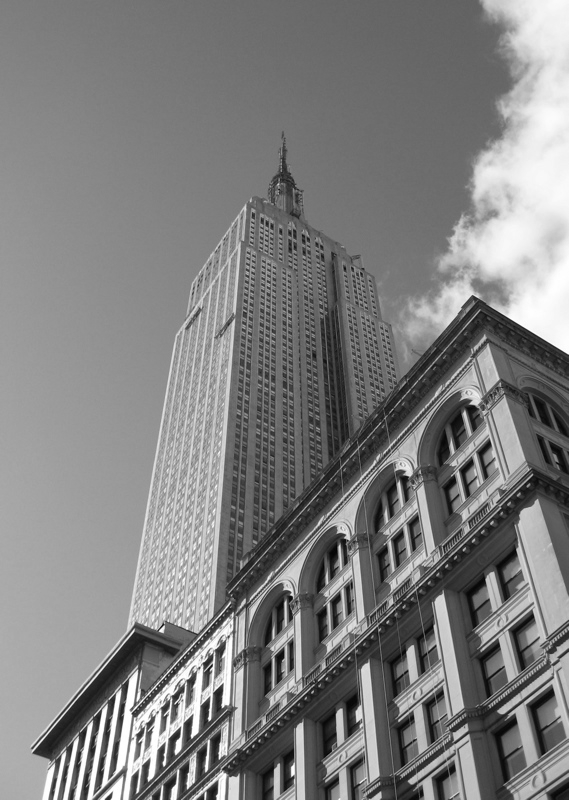

In [5]:
from PIL import Image
pil_im = Image.open('empire.jpg').convert('L')
pil_im

### Matplotlib(Plotting images, points and lines)

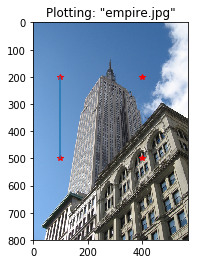

In [8]:
from PIL import Image
from pylab import *

# read image to array
# 이미지를 배열 방식으로 읽는다
im = array(Image.open('empire.jpg'))

# plot the image
# 이미지에 plot을 적용
imshow(im)


# some points
# 포인트들
x = [100, 100, 400, 400]
y = [200, 500, 200, 500]

# plot the poins with red star-markers
# plot 에 붉은 스타를 남긴다.
plot(x, y, 'r*')

# line plot connecting the first two point
# plot라인의 두점을 연결
plot(x[:2], y[:2])

# add title and show the plot
# plot을 보여주고 제목을 추가
title('Plotting: "empire.jpg"')
show()

### Harris corner detector

In [12]:
from scipy.ndimage import filters
def compute_harris_response(im,sigma=3):
    """ Compute the Harris corner detector response function
    for each pixel in a graylevel image. """
    
    # derivatives
    imx = zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
    imy = zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)
    
    # compute components of the Harris matrix
    Wxx = filters.gaussian_filter(imx*imx,sigma)
    Wxy = filters.gaussian_filter(imx*imy,sigma)
    Wyy = filters.gaussian_filter(imy*imy,sigma)
    
    # determinant and trace
    Wdet = Wxx*Wyy - Wxy**2
    Wtr = Wxx + Wyy
    
    return Wdet / Wtr

In [13]:
def get_harris_points(harrisim,min_dist=10,threshold=0.1):
    """ Return corners from a Harris response image
    min_dist is the minimum number of pixels separating
    corners and image boundary. """
    
    # find top corner candidates above a threshold
    corner_threshold = harrisim.max() * threshold
    harrisim_t = (harrisim > corner_threshold) * 1
    
    # get coordinates of candidates
    coords = array(harrisim_t.nonzero()).T
    
    # ...and their values
    candidate_values = [harrisim[c[0],c[1]] for c in coords]
    
    # sort candidates
    index = argsort(candidate_values)
    
    # store allowed point locations in array
    allowed_locations = zeros(harrisim.shape)
    allowed_locations[min_dist:-min_dist,min_dist:-min_dist] = 1
    
    # select the best points taking min_distance into account
    filtered_coords = []
    for i in index:
        if allowed_locations[coords[i,0],coords[i,1]] == 1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i,0]-min_dist):(coords[i,0]+min_dist), (coords[i,1]-min_dist):(coords[i,1]+min_dist)] = 0
    return filtered_coords        

In [14]:
def plot_harris_points(image,filtered_coords):
    """ Plots corners found in image. """
    figure()
    gray()
    imshow(image)
    plot([p[1] for p in filtered_coords],[p[0] for p in filtered_coords],'*')
    axis('off')
    show()

Please click 3 points
you clicked: []


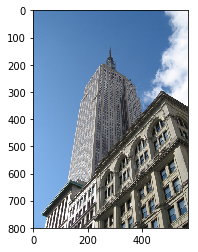

In [9]:
from PIL import Image
from pylab import *
im = array(Image.open("empire.jpg"))
imshow(im)
print("Please click 3 points")
x = ginput(3)
print("you clicked:",x)
show()

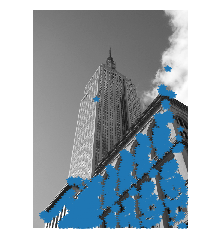

In [23]:
im = array(Image.open('empire.jpg').convert('L'))
harrisim = compute_harris_response(im)
filtered_coords = get_harris_points(harrisim,6)
plot_harris_points(im, filtered_coords)

### nomerlizing

In [38]:
def get_descriptors(image,filtered_coords,wid=5):
    """ For each point return pixel values around the point
    using a neighbourhood of width 2*wid+1. (Assume points are
    extracted with min_distance > wid). """
    desc = []
    for coords in filtered_coords:
        patch = image[coords[0]-wid:coords[0]+wid+1, coords[1]-wid:coords[1]+wid+1].flatten()
        desc.append(patch)
    return desc

def match(desc1,desc2,threshold=0.5):
    """ For each corner point descriptor in the first image,
    select its match to second image using
    normalized cross correlation. """
    n = len(desc1[0])
    
    # pair-wise distances
    d = - ones((len(desc1),len(desc2)))
    for i in range(len(desc1)):
        for j in range(len(desc2)):
            d1 = (desc1[i] - mean(desc1[i])) / std(desc1[i])
            d2 = (desc2[j] - mean(desc2[j])) / std(desc2[j])
            ncc_value = sum(d1 * d2) / (n-1)
            if ncc_value > threshold:
                d[i,j] = ncc_value
                
    ndx = argsort(-d)
    matchscores = ndx[:,0]
    
    return matchscores

In [39]:
def match_twosided(desc1,desc2,threshold=0.5):
    """ Two-sided symmetric version of match()."""
    matches_12 = match(desc1,desc2,threshold)
    matches_21 = match(desc2,desc1,threshold)
    ndx_12 = where(matches_12 >= 0)[0]
    # remove matches that are not symmetric
    for n in ndx_12:
        if matches_21[matches_12[n]] != n:
            matches_12[n] = -1
    return matches_12    

In [43]:
def appendimages(im1,im2):
    """ Return a new image that appends the two images side-by-side. """
    
    # select the image with the fewest rows and fill in enough empty rows
    rows1 = im1.shape[0]
    rows2 = im2.shape[0]
    
    if rows1 < rows2:
        im1 = concatenate((im1,zeros((rows2-rows1,im1.shape[1]))),axis=0)
    elif rows1 > rows2:
        im2 = concatenate((im2,zeros((rows1-rows2,im2.shape[1]))),axis=0)
    # if none of these cases they are equal, no filling needed.
    
    return concatenate((im1,im2), axis=1)

def plot_matches(im1,im2,locs1,locs2,matchscores,show_below=True):
    """ Show a figure with lines joining the accepted matches
    input: im1,im2 (images as arrays), locs1,locs2 (feature locations),
    matchscores (as output from ’match()’),
    show_below (if images should be shown below matches). """
    im3 = appendimages(im1,im2)
    
    if show_below:
        im3 = vstack((im3,im3))
    
    imshow(im3)
    
    cols1 = im1.shape[1]
    
    for i,m in enumerate(matchscores):
        if m>0:
            plot([locs1[i][1],locs2[m][1]+cols1],[locs1[i][0],locs2[m][0]],"c")
    axis("off")

Im1과 Im2의 비교가 원본과 필터링된 이미지를 비교하는것인지 다른것인지 아직 확신되지 않음.

In [42]:
wid = 5
harrisim = compute_harris_response(im1,5)
filtered_coords1 = get_harris_points(harrisim,wid+1)
d1 = get_descriptors(im1,filtered_coords1,wid)
harrisim = compute_harris_response(im2,5)
filtered_coords2 = get_harris_points(harrisim,wid+1)
d2 = get_descriptors(im2,filtered_coords2,wid)
print("starting matching")
matches = match_twosided(d1,d2)
figure()
gray()
harris.plot_matches(im1,im2,filtered_coords1,filtered_coords2,matches)
show()

NameError: name 'im1' is not defined